<a href="https://colab.research.google.com/github/SidharthBhakth/Feedforward-NNs-in-pyTorch/blob/main/01_A_Detailed_View_to_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Detailed View to MNIST Classification**

In [ ]:
# Import libraries

import numpy as np

import pandas as pd

import torch
import torchvision
from torch import nn, optim

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE

In [ ]:
# Check if GPU is available
print(torch.cuda.is_available())

# Set device to GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

True


device(type='cuda')

In [ ]:
# Load MNIST data

# Train data
mnist_train=torchvision.datasets.MNIST('mnist',
                                       train=True,
                                       download=True,
                                       transform=torchvision.transforms.Compose(
                                                                                [torchvision.transforms.ToTensor(),
                                                                                torchvision.transforms.Normalize((0.1307,), (0.3081,))]
                                                                                )
                                       )


# Test data
mnist_test=torchvision.datasets.MNIST('mnist',
                                       train=False,
                                       download=True,
                                       transform=torchvision.transforms.Compose(
                                                                                [torchvision.transforms.ToTensor(),
                                                                                torchvision.transforms.Normalize((0.1307,), (0.3081,))]
                                                                                )
                                       )

In [ ]:
print("No: of images in train data set - ", len(mnist_train))
X_train = mnist_train.data
Y_train = mnist_train.targets

print("No: of images in test data set - ", len(mnist_test))
X_test = mnist_test.data
Y_test = mnist_test.targets

No: of images in train data set -  60000
No: of images in test data set -  10000


In [ ]:
# reshape images to 1D array to input to the neural network
X_train = torch.reshape(X_train, (-1, 784)).float().to(device)
Y_train = torch.LongTensor(Y_train).to(device)

X_test = torch.reshape(X_test, (-1, 784)).float().to(device)
Y_test = torch.LongTensor(Y_test).to(device)

In [ ]:
# Define a neural network architecture with 5 hidden layers of 1024 neurons per layer

class FiveLayerNN(nn.Module):
  def __init__(self):
    super(FiveLayerNN, self).__init__()
    self.hidden_layer1 = nn.Linear(784, 1024)
    self.hidden_layer2 = nn.Linear(1024, 1024)
    self.hidden_layer3 = nn.Linear(1024, 1024)
    self.hidden_layer4 = nn.Linear(1024, 1024)
    self.hidden_layer5 = nn.Linear(1024, 1024)
    self.output_layer = nn.Linear(1024, 10)
    self.activation = nn.ReLU()
  
  def forward(self, X):
    self.X = X
    self.hidden1 = self.activation(self.hidden_layer1(self.X))
    self.hidden2 = self.activation(self.hidden_layer2(self.hidden1))
    self.hidden3 = self.activation(self.hidden_layer3(self.hidden2))
    self.hidden4 = self.activation(self.hidden_layer4(self.hidden3))
    self.hidden5 = self.activation(self.hidden_layer5(self.hidden4))
    self.output = self.output_layer(self.hidden5)
    
    return self.output

In [ ]:
## Training loop

# Initilize NN class
NN = FiveLayerNN()
NN.to(device)

# hyperparameters
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(NN.parameters(), lr=0.005, momentum = 0.9)
epochs = 50
batch_size = 100

loss = []

for i in range(epochs):
  running_loss = 0
  for j in range(0, 60000, batch_size):
    
    X_mini = X_train[j:j+batch_size]
    Y_mini = Y_train[j:j+batch_size]
    
    optimizer.zero_grad()

    output = NN(X_mini)
    
    # compute loss
    loss_ = loss_fn(output, Y_mini)
    running_loss += loss_.data

    # Backpropagation
    loss_.backward()
    optimizer.step()

  loss.append(running_loss/600)
  
  if (i+1)%5 == 0:
    print("Epoch {} || training loss: {:.6f}".format(i+1, running_loss/600))

Epoch 5 || training loss: 0.026652
Epoch 10 || training loss: 0.011185
Epoch 15 || training loss: 0.005858
Epoch 20 || training loss: 0.002940
Epoch 25 || training loss: 0.000022
Epoch 30 || training loss: 0.000012
Epoch 35 || training loss: 0.000009
Epoch 40 || training loss: 0.000007
Epoch 45 || training loss: 0.000005
Epoch 50 || training loss: 0.000005


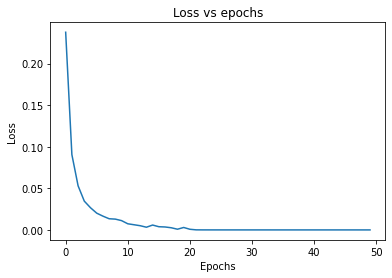

In [ ]:
# Plot loss curve
plt.plot(loss)
plt.title("Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss");

In [ ]:
# Randomly sample 1000 points from test data
rand_idx = torch.from_numpy(np.random.randint(len(X_test), size=1000))

X_test_sample = X_test[rand_idx]
Y_test_sample = Y_test[rand_idx]

# Feedforward step on the sub-sample
with torch.no_grad():
  output = NN(X_test_sample)

# For each 10-D output, find the dim with the maximum probability
Y_pred = torch.argmax(output, dim=1)

# Computing accuracy
accuracy = 100 * (sum(Y_pred == Y_test_sample).item() / len(Y_test_sample))
print("Accuracy on testing sample: {:.2f}%".format(accuracy))

Accuracy on testing sample: 98.50%


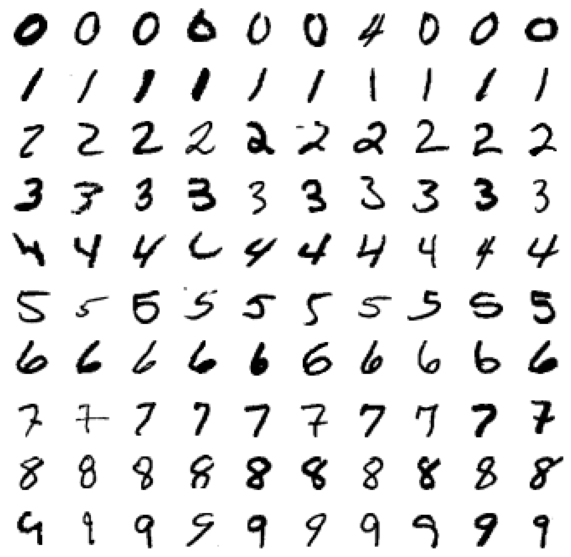

In [ ]:
# 10 x 10 grid of subplots for last layer outputs
fig = plt.figure(figsize=(10,10))
ax = 1

for i in range(10):
  imgs = X_test_sample[Y_pred == i][:10].cpu()
  for j in range(len(imgs)):
    fig.add_subplot(10, 10, ax)
    ax += 1
    plt.axis('off')
    plt.imshow(imgs[j].reshape(28,28), cmap = 'binary')

plt.show()

In the subplot, we can see from the visualization of output layer that the neural network is able to distinguish clearly between digits with only rare cases being misclassified.

In [ ]:
rand_dim = torch.from_numpy(np.random.randint(0, 1024, size=10))
hl5_sample = NN.hidden5[:, rand_dim].data
hl5_pred_sample = torch.argmax(hl5_sample, dim=1)

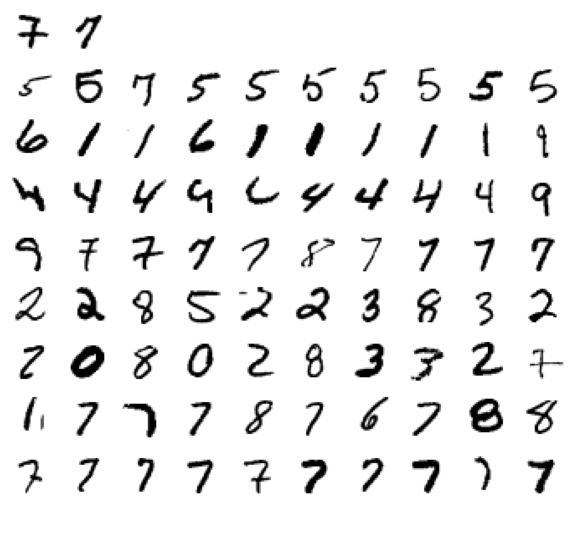

In [ ]:
# 10 x 10 grid of subplots for hidden layer 5 activations
fig = plt.figure(figsize=(10,10))
ax = 1

for i in range(10):
  imgs = X_test_sample[hl5_pred_sample == i][:10].cpu()
  for j in range(10):
    fig.add_subplot(10, 10, ax)
    ax += 1
    plt.axis('off')
    try:
      plt.imshow(imgs[j].reshape(28,28), cmap = 'binary')
    except:
      plt.imshow(255*np.ones((28,28)), cmap = 'binary')

plt.show()

In this subplot, we have visualized the output of the last hidden layer and we can see feature representations. Rows 2, 3, 4 and 5 and 10 are strong features  able to distinguish the digits 5, 1, 4, 7 and 7 respectively from the rest of the digits. The other rows are a combination of different digits and are seldom able to distinguish between the digits.

Choosing the feature representation using an autoencoder and using that as the input to the neural network would have yielded better results.

In [ ]:
def tSNE_2D_plot(x,y):
  tsne = TSNE(n_components=2)
  model = tsne.fit_transform(x)
  model_transformed = np.hstack((model, y.reshape(len(y),1)))
  
  df = pd.DataFrame(columns=['Component 1', 'Component 2', 'label'])
  means = {}

  plt.figure(figsize=(12,10))

  for i in range(10):
    temp = model_transformed[model_transformed[:,2] == i,]    
    
    C1_mean = np.mean(temp[:,0])
    C2_mean = np.mean(temp[:,1])

    means[int(i)] = (C1_mean, C2_mean)

    temp_df = pd.DataFrame()
    temp_df['Component 1'] = temp[:,0]
    temp_df['Component 2'] = temp[:,1]
    temp_df['label'] = int(i)

    df = df.append(temp_df)

  fig = sns.scatterplot(data=df, x='Component 1', y='Component 2', hue='label', palette='muted')

  # annotate
  for label, mean in means.items():
    fig.text(x=mean[0], y=mean[1], s=label, horizontalalignment='left', color='black', size='large', weight='medium')

  plt.legend(loc='upper right')
  plt.title("t-SNE plot")

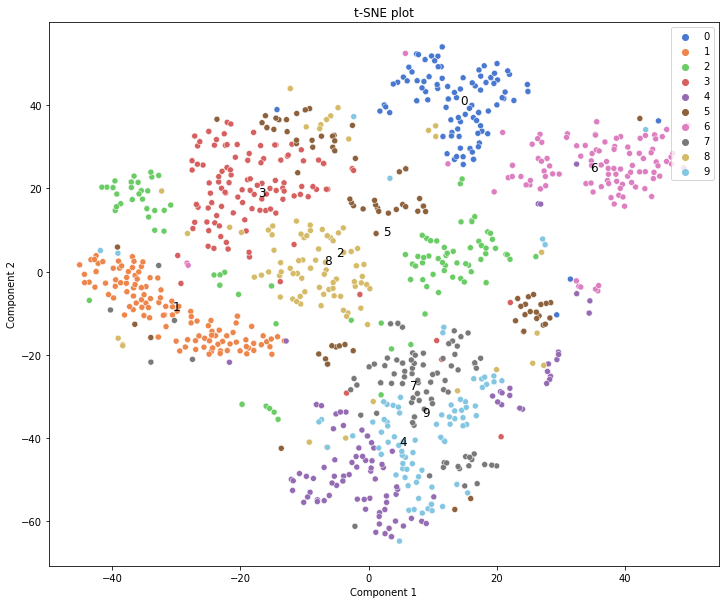

In [ ]:
# Input
tSNE_2D_plot(X_test_sample.cpu(), Y_test_sample.cpu())

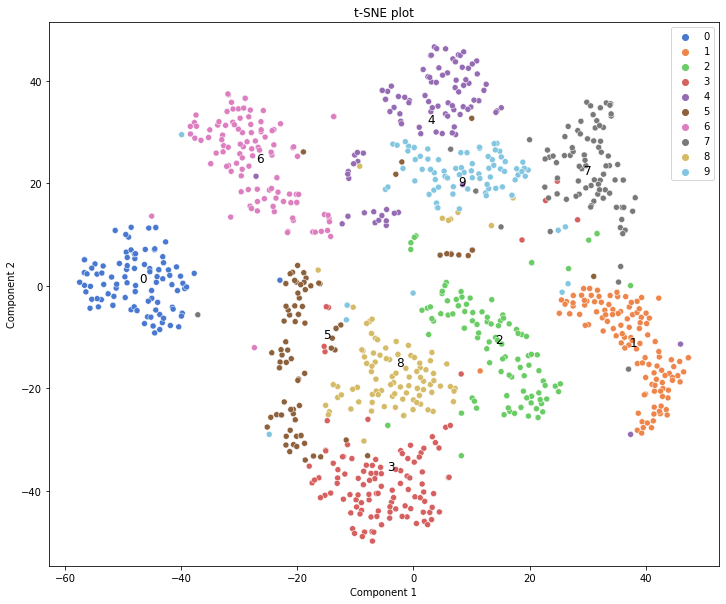

In [ ]:
# First hidden layer
tSNE_2D_plot(NN.hidden1.cpu(), Y_test_sample.cpu())

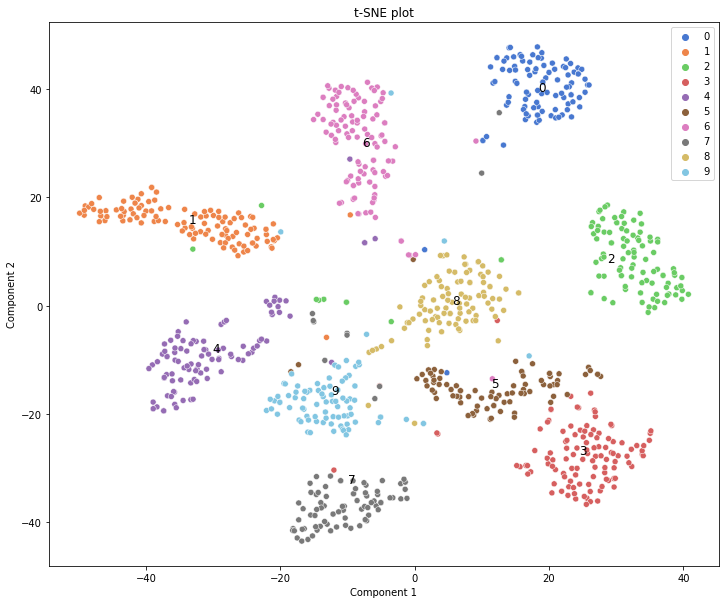

In [ ]:
# Second hidden layer
tSNE_2D_plot(NN.hidden2.cpu(), Y_test_sample.cpu())

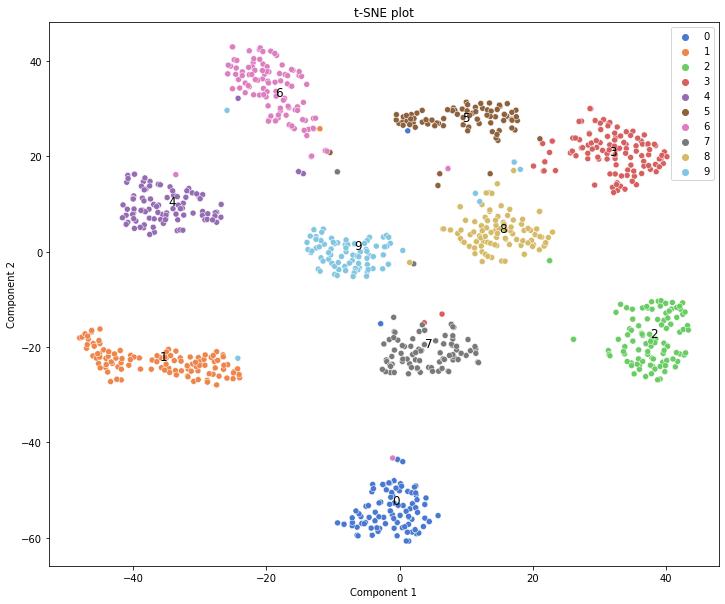

In [ ]:
# Third hidden layer
tSNE_2D_plot(NN.hidden3.cpu(), Y_test_sample.cpu())

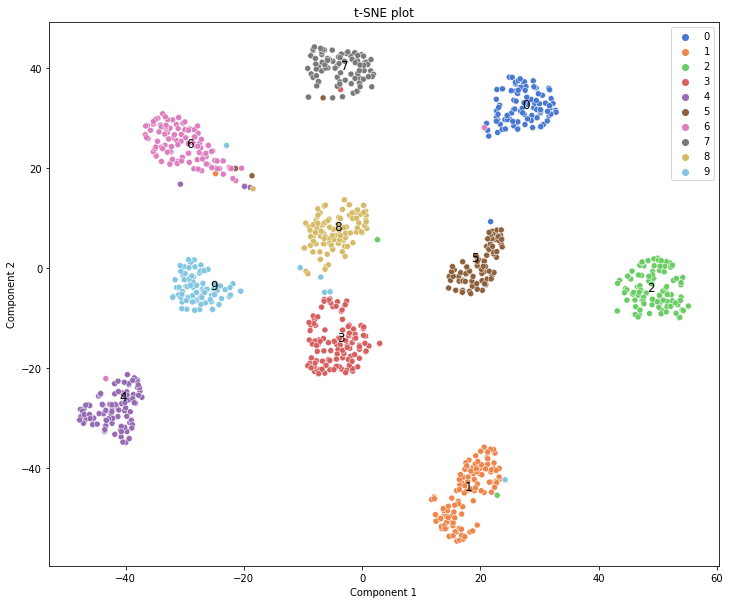

In [ ]:
# Fourth hidden layer
tSNE_2D_plot(NN.hidden4.cpu(), Y_test_sample.cpu())

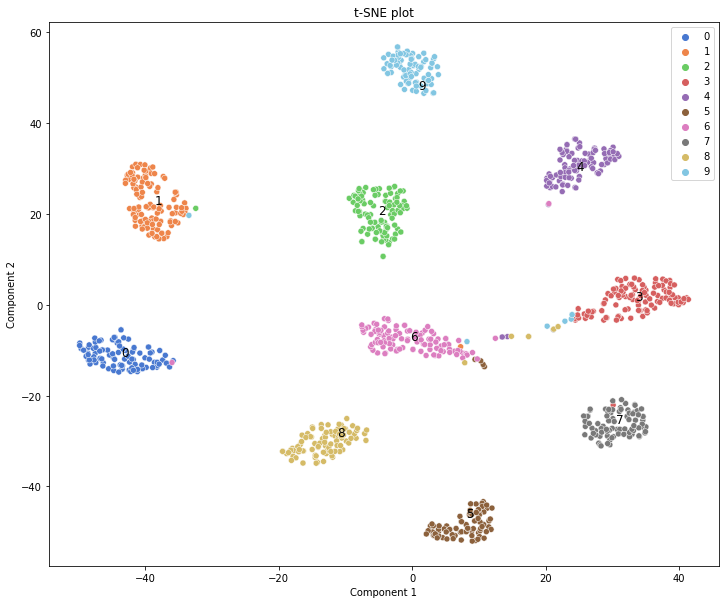

In [ ]:
# Fifth hidden layer
tSNE_2D_plot(NN.hidden5.cpu(), Y_test_sample.cpu())

## Observations:

**t-SNE** is a powerful tool to represnt high dimensional vectors in a lower dimensional space while respecting the actual distance between the vectors. As we progress through the network, the clusters representing each digit become distinct and identifiable. This can be understood as the neural network learning the features represnting each digit better as the input flows through the initial layers to the final layers. The separation between the clusters becomes more and more pronounced as we reach the later layers. The final layers show distinct clusters for each label with only a few data points belonging to the wrong class.